In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=15f8f18de76a379acdd58914e9b16090fb690859e4d7a82241ab47dabc84b413
  Stored in directory: c:\users\david\appdata\local\pip\cache\wheels\23\9d\42\5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [2]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [3]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [4]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_period', 'koi_steff', 'koi_slogg', 'koi_srad', 'koi_duration']]
selected_features

,koi_period,koi_steff,koi_slogg,koi_srad,koi_duration
0,54.418383,5455,4.467,0.927,4.50700
1,19.899140,5853,4.544,0.868,1.78220
2,1.736952,5805,4.564,0.791,2.40641
3,2.525592,6031,4.438,1.046,1.65450
4,4.134435,6046,4.486,0.972,3.14020
...,...,...,...,...,...
6986,8.589871,5638,4.296,1.088,4.80600
6987,0.527699,5638,4.529,0.903,3.22210
6988,1.739849,6119,4.444,1.031,3.11400
6989,0.681402,6173,4.447,1.041,0.86500


In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data = df["koi_disposition"].copy()

label_encoder.fit(data)
label_encoder.classes_




array(['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE'], dtype=object)

In [ ]:
X = selected_features
y = label_encoder.transform(df["koi_disposition"]).reshape(-1, 1)
print(X.shape, y.shape)

# Create a Train Test Split

Use `koi_disposition` for the y values

In [22]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,koi_period,koi_steff,koi_slogg,koi_srad,koi_duration
6122,6.768901,5737,4.327,1.125,3.61600
6370,0.733726,5855,4.578,0.797,2.30900
2879,7.652707,6328,4.481,0.963,79.89690
107,7.953547,4768,4.536,0.779,2.63120
29,4.959319,5712,4.359,1.082,2.22739


In [33]:
df.corr

<bound method DataFrame.corr of      koi_disposition  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  \
0          CONFIRMED              0              0              0   
1     FALSE POSITIVE              0              1              0   
2     FALSE POSITIVE              0              1              0   
3          CONFIRMED              0              0              0   
4          CONFIRMED              0              0              0   
...              ...            ...            ...            ...   
6986  FALSE POSITIVE              0              0              0   
6987  FALSE POSITIVE              0              1              1   
6988       CANDIDATE              0              0              0   
6989  FALSE POSITIVE              0              0              1   
6990  FALSE POSITIVE              0              0              1   

      koi_fpflag_ec  koi_period  koi_period_err1  koi_period_err2  \
0                 0   54.418383     2.479000e-04    -2.479000e-04   
1

In [23]:
y_train

array([[0],
       [2],
       [2],
       ...,
       [2],
       [2],
       [2]])

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [24]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)
y_minmax = MinMaxScaler().fit(y_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)
y_train_minmax = y_minmax.transform(y_train)
y_test_minmax = y_minmax.transform(y_test)

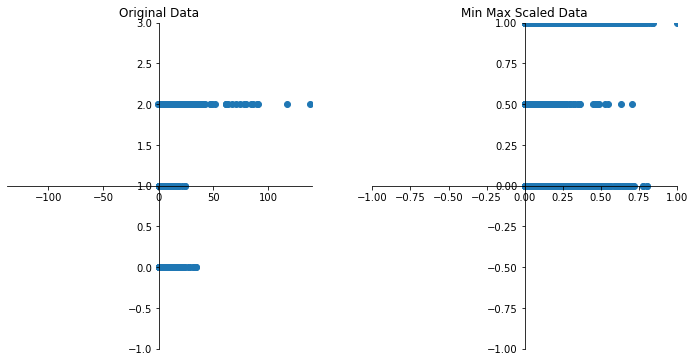

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Min Max Scaled Data")

maxx = X_train["koi_duration"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-1, 1)
axes2.set_ylim(-1, 1)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["koi_duration"], y_train)
axes2.scatter(X_train_minmax[:,0], y_train_minmax[:])

# Train the Model



In [34]:
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

NameError: name 'model2' is not defined

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Create the GridSearchCV model

In [ ]:
# Train the model with GridSearch

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'model.sav'
joblib.dump(your_model, filename)